In [10]:
import pandas as pd
pd.set_option('display.max_columns', None)

In [11]:
!pip install geopandas

In [12]:
df = pd.read_csv('../data/groupedby_distric_month_nature.csv')
df=df.drop('Unnamed: 0',axis=1)

In [13]:
df

,Distrito_AVEIRO__,Distrito_BEJA__,Distrito_BRAGANÇA__,Distrito_BRAGA__,Distrito_CASTELO BRANCO__,Distrito_COIMBRA__,Distrito_FARO__,Distrito_GUARDA__,Distrito_LEIRIA__,Distrito_LISBOA__,Distrito_PORTALEGRE__,Distrito_PORTO__,Distrito_SANTARÉM__,Distrito_SETÚBAL__,Distrito_VIANA DO CASTELO__,Distrito_VILA REAL__,Distrito_VISEU__,Distrito_ÉVORA__,Grouped_Acidentes__,Grouped_Assistência e Prevenção__,Grouped_Incêndios em Bens__,Grouped_Incêndios__,Grouped_Operações__,Grouped_Segurança e Serviços__,MesOcorrencia__,NumeroMeiosTerrestresEnvolvidos_max_max,NumeroMeiosTerrestresEnvolvidos_max_mean,NumeroMeiosTerrestresEnvolvidos_max_min,NumeroOperacionaisTerrestresEnvolvidos_max_max,NumeroOperacionaisTerrestresEnvolvidos_max_mean,NumeroOperacionaisTerrestresEnvolvidos_max_min
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,2.0,1.000000,0.0,4.0,2.000000,0.0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,2,3.0,2.000000,1.0,9.0,4.400000,2.0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,3,2.0,1.666667,1.0,7.0,4.666667,3.0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,4,2.0,2.000000,2.0,7.0,5.000000,4.0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,5,3.0,2.181818,1.0,9.0,5.181818,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,8,6.0,3.041667,1.0,13.0,7.125000,2.0
1204,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,9,6.0,3.347826,1.0,13.0,8.086957,2.0
1205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10,6.0,3.600000,1.0,13.0,8.960000,2.0
1206,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,11,6.0,3.269231,1.0,13.0,7.807692,2.0


In [14]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# 2. Create a new dataframe with the desired columns
new_df = df.filter(regex='Distrito|Grouped|MesOcorrencia|NumeroOperacionaisTerrestresEnvolvidos|NumeroMeiosTerrestresEnvolvidos')

In [15]:
# 3. Convert one-hot encoding to categorical columns
new_df['Distrito'] = new_df.filter(regex='Distrito').idxmax(axis=1).str.replace("Distrito_", "")
new_df['Group'] = new_df.filter(regex='Grouped').idxmax(axis=1).str.replace("Grouped_", "")
new_df.drop(new_df.filter(regex='Distrito_|Grouped').columns, axis=1, inplace=True)

In [16]:
new_df

,MesOcorrencia__,NumeroMeiosTerrestresEnvolvidos_max_max,NumeroMeiosTerrestresEnvolvidos_max_mean,NumeroMeiosTerrestresEnvolvidos_max_min,NumeroOperacionaisTerrestresEnvolvidos_max_max,NumeroOperacionaisTerrestresEnvolvidos_max_mean,NumeroOperacionaisTerrestresEnvolvidos_max_min,Distrito,Group
0,1,2.0,1.000000,0.0,4.0,2.000000,0.0,ÉVORA__,Segurança e Serviços__
1,2,3.0,2.000000,1.0,9.0,4.400000,2.0,ÉVORA__,Segurança e Serviços__
2,3,2.0,1.666667,1.0,7.0,4.666667,3.0,ÉVORA__,Segurança e Serviços__
3,4,2.0,2.000000,2.0,7.0,5.000000,4.0,ÉVORA__,Segurança e Serviços__
4,5,3.0,2.181818,1.0,9.0,5.181818,2.0,ÉVORA__,Segurança e Serviços__
...,...,...,...,...,...,...,...,...,...
1203,8,6.0,3.041667,1.0,13.0,7.125000,2.0,AVEIRO__,Acidentes__
1204,9,6.0,3.347826,1.0,13.0,8.086957,2.0,AVEIRO__,Acidentes__
1205,10,6.0,3.600000,1.0,13.0,8.960000,2.0,AVEIRO__,Acidentes__
1206,11,6.0,3.269231,1.0,13.0,7.807692,2.0,AVEIRO__,Acidentes__


In [17]:
# Replace values in 'col1' with the same value without the '__' suffix
new_df['Distrito'] = new_df['Distrito'].apply(lambda x: x[:-2])

In [18]:
new_df["Distrito"].unique()

array(['ÉVORA', 'VISEU', 'VILA REAL', 'VIANA DO CASTELO', 'SETÚBAL',
       'SANTARÉM', 'PORTO', 'PORTALEGRE', 'LISBOA', 'LEIRIA', 'GUARDA',
       'FARO', 'COIMBRA', 'CASTELO BRANCO', 'BRAGA', 'BRAGANÇA', 'BEJA',
       'AVEIRO'], dtype=object)

In [19]:
# Replace values in 'col1' with the same value without the '__' suffix
new_df['Group'] = new_df['Group'].apply(lambda x: x[:-2])

In [20]:
new_df["Group"].unique()

array(['Segurança e Serviços', 'Operações', 'Incêndios',
       'Incêndios em Bens', 'Assistência e Prevenção', 'Acidentes'],
      dtype=object)

In [21]:
new_df

,MesOcorrencia__,NumeroMeiosTerrestresEnvolvidos_max_max,NumeroMeiosTerrestresEnvolvidos_max_mean,NumeroMeiosTerrestresEnvolvidos_max_min,NumeroOperacionaisTerrestresEnvolvidos_max_max,NumeroOperacionaisTerrestresEnvolvidos_max_mean,NumeroOperacionaisTerrestresEnvolvidos_max_min,Distrito,Group
0,1,2.0,1.000000,0.0,4.0,2.000000,0.0,ÉVORA,Segurança e Serviços
1,2,3.0,2.000000,1.0,9.0,4.400000,2.0,ÉVORA,Segurança e Serviços
2,3,2.0,1.666667,1.0,7.0,4.666667,3.0,ÉVORA,Segurança e Serviços
3,4,2.0,2.000000,2.0,7.0,5.000000,4.0,ÉVORA,Segurança e Serviços
4,5,3.0,2.181818,1.0,9.0,5.181818,2.0,ÉVORA,Segurança e Serviços
...,...,...,...,...,...,...,...,...,...
1203,8,6.0,3.041667,1.0,13.0,7.125000,2.0,AVEIRO,Acidentes
1204,9,6.0,3.347826,1.0,13.0,8.086957,2.0,AVEIRO,Acidentes
1205,10,6.0,3.600000,1.0,13.0,8.960000,2.0,AVEIRO,Acidentes
1206,11,6.0,3.269231,1.0,13.0,7.807692,2.0,AVEIRO,Acidentes


In [22]:
# 4. Calculate aggregated values
aggregated_df = new_df.groupby(['Distrito', 'MesOcorrencia__', 'Group']).agg({
    'NumeroOperacionaisTerrestresEnvolvidos_max_max': 'max',
    'NumeroOperacionaisTerrestresEnvolvidos_max_mean': 'mean',
    'NumeroOperacionaisTerrestresEnvolvidos_max_min': 'min',
    'NumeroMeiosTerrestresEnvolvidos_max_max': 'max',
    'NumeroMeiosTerrestresEnvolvidos_max_mean': 'mean',
    'NumeroMeiosTerrestresEnvolvidos_max_min': 'min'
}).reset_index()

aggregated_df

,Distrito,MesOcorrencia__,Group,NumeroOperacionaisTerrestresEnvolvidos_max_max,NumeroOperacionaisTerrestresEnvolvidos_max_mean,NumeroOperacionaisTerrestresEnvolvidos_max_min,NumeroMeiosTerrestresEnvolvidos_max_max,NumeroMeiosTerrestresEnvolvidos_max_mean,NumeroMeiosTerrestresEnvolvidos_max_min
0,AVEIRO,1,Acidentes,13.0,5.428571,2.0,6.0,2.428571,1.0
1,AVEIRO,1,Assistência e Prevenção,10.0,5.375000,2.0,6.0,2.125000,1.0
2,AVEIRO,1,Incêndios,13.0,9.285714,3.0,6.0,3.428571,1.0
3,AVEIRO,1,Incêndios em Bens,9.0,7.250000,5.0,3.0,2.250000,1.0
4,AVEIRO,1,Operações,12.0,12.000000,12.0,3.0,3.000000,3.0
...,...,...,...,...,...,...,...,...,...
1203,ÉVORA,12,Acidentes,13.0,7.181818,4.0,6.0,3.272727,2.0
1204,ÉVORA,12,Assistência e Prevenção,8.0,3.851852,2.0,4.0,1.740741,1.0
1205,ÉVORA,12,Incêndios,13.0,8.444444,2.0,6.0,3.222222,1.0
1206,ÉVORA,12,Incêndios em Bens,13.0,5.294118,2.0,6.0,2.176471,1.0


In [24]:
# 5. Merge aggregated data with geospatial data
# Load the geospatial data for Portugal districts (replace 'path_to_geodata' with the actual path to the geodata file)
gdf = gpd.read_file('../data/PRT_adm/PRT_adm1.shp')
# Convert values in 'col1' to uppercase
gdf['NAME_1'] = gdf['NAME_1'].str.upper()
gdf.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,182,PRT,Portugal,1,ÉVORA,Distrito,District,NaN,NaN,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466..."
1,182,PRT,Portugal,2,AVEIRO,Distrito,District,NaN,NaN,"MULTIPOLYGON (((-8.68208 40.69458, -8.68208 40..."
2,182,PRT,Portugal,3,AZORES,Regiões autônoma,Autonomous region,NaN,Açores,"MULTIPOLYGON (((-25.08910 37.01562, -25.08904 ..."
3,182,PRT,Portugal,4,BEJA,Distrito,District,NaN,NaN,"MULTIPOLYGON (((-8.79264 37.71875, -8.79264 37..."
4,182,PRT,Portugal,5,BRAGA,Distrito,District,NaN,NaN,"POLYGON ((-8.04962 41.81636, -8.04908 41.81543..."


In [25]:
merged_gdf = gdf.merge(aggregated_df, left_on='NAME_1', right_on='Distrito')

In [26]:
merged_gdf.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,Distrito,MesOcorrencia__,Group,NumeroOperacionaisTerrestresEnvolvidos_max_max,NumeroOperacionaisTerrestresEnvolvidos_max_mean,NumeroOperacionaisTerrestresEnvolvidos_max_min,NumeroMeiosTerrestresEnvolvidos_max_max,NumeroMeiosTerrestresEnvolvidos_max_mean,NumeroMeiosTerrestresEnvolvidos_max_min
0,182,PRT,Portugal,1,ÉVORA,Distrito,District,NaN,NaN,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",ÉVORA,1,Acidentes,10.0,6.750000,4.0,4.0,2.750000,2.0
1,182,PRT,Portugal,1,ÉVORA,Distrito,District,NaN,NaN,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",ÉVORA,1,Assistência e Prevenção,8.0,4.000000,2.0,4.0,1.875000,1.0
2,182,PRT,Portugal,1,ÉVORA,Distrito,District,NaN,NaN,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",ÉVORA,1,Incêndios,13.0,10.666667,6.0,6.0,4.333333,3.0
3,182,PRT,Portugal,1,ÉVORA,Distrito,District,NaN,NaN,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",ÉVORA,1,Incêndios em Bens,11.0,6.000000,0.0,3.0,1.666667,0.0
4,182,PRT,Portugal,1,ÉVORA,Distrito,District,NaN,NaN,"POLYGON ((-8.14205 39.01529, -8.14165 39.01466...",ÉVORA,1,Segurança e Serviços,4.0,2.000000,0.0,2.0,1.000000,0.0


In [27]:
merged_gdf["Group"].unique()

array(['Acidentes', 'Assistência e Prevenção', 'Incêndios',
       'Incêndios em Bens', 'Segurança e Serviços', 'Operações'],
      dtype=object)

In [39]:
# create a dictionary with the translations
translation_dict = {
    'Acidentes': 'Accidents',
    'Assistência e Prevenção': 'Assistance and Prevention',
    'Incêndios': 'Fires',
    'Incêndios em Bens': 'Fires in Properties',
    'Segurança e Serviços': 'Security and Services',
    'Operações': 'Operations'
}

# replace the values in the column with their translations
merged_gdf['Group'] = merged_gdf['Group'].replace(translation_dict)

In [40]:
merged_gdf["Group"].unique()

array(['Accidents', 'Assistance and Prevention', 'Fires',
       'Fires in Properties', 'Security and Services', 'Operations'],
      dtype=object)

In [41]:
def create_heatmap(month,group,var='NumeroOperacionaisTerrestresEnvolvidos_max_max'):
    # 6. Plot the map using GeoPandas
	# Choose the desired column for visualization, for example 'NumeroOperacionaisTerrestresEnvolvidos_max_max'
	column_to_visualize = var
	fig, ax = plt.subplots(1, figsize=(8, 8))
	# Select rows where 'col1' is equal to 'def'
	selected_merged_gdf = merged_gdf[merged_gdf['MesOcorrencia__'] == month]
	selected_merged_gdf = selected_merged_gdf[selected_merged_gdf['Group'] == group]
	vmin, vmax = 0, merged_gdf[merged_gdf['Group'] == group][column_to_visualize].max()

	selected_merged_gdf.plot(column=column_to_visualize, cmap='coolwarm', vmin=vmin, vmax=vmax, linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
	ax.axis('off')

	# Split the string into its components using the underscore character
	components = var.split('_')

	# Remove the last element from the list of components
	components = [components[0],components[2]]

	# Join the components back together with underscores to form the new string
	output_str = '_'.join(components)
	plt.title('Map of: '+output_str+"\nMonth: "+str(month)+"\nGroup: "+group)
	plt.show()

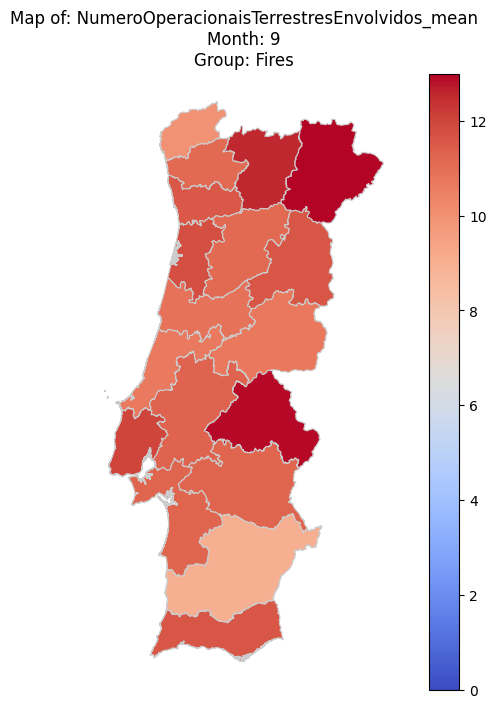

In [43]:
create_heatmap(9,"Fires",var='NumeroOperacionaisTerrestresEnvolvidos_max_mean')

In [44]:
import numpy as np

# Create a one-dimensional NumPy array with the specified column names
values_array = np.array(['NumeroOperacionaisTerrestresEnvolvidos_max_max',
                         'NumeroOperacionaisTerrestresEnvolvidos_max_mean',
                         'NumeroOperacionaisTerrestresEnvolvidos_max_min',
                         'NumeroMeiosTerrestresEnvolvidos_max_max',
                         'NumeroMeiosTerrestresEnvolvidos_max_mean',
                         'NumeroMeiosTerrestresEnvolvidos_max_min'])
values_array

array(['NumeroOperacionaisTerrestresEnvolvidos_max_max',
       'NumeroOperacionaisTerrestresEnvolvidos_max_mean',
       'NumeroOperacionaisTerrestresEnvolvidos_max_min',
       'NumeroMeiosTerrestresEnvolvidos_max_max',
       'NumeroMeiosTerrestresEnvolvidos_max_mean',
       'NumeroMeiosTerrestresEnvolvidos_max_min'], dtype='<U47')

In [45]:
new_df['MesOcorrencia__'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [32]:
uga

NameError: name 'uga' is not defined

In [47]:
from ipywidgets import interact, Dropdown
from IPython.display import clear_output

# Create the interactive dropdown menu
var = values_array
months = new_df['MesOcorrencia__'].unique()
groups = merged_gdf['Group'].unique()

dropdown_var = Dropdown(options=var, value=var[0], description='Variable:')
dropdown_month = Dropdown(options=months, value=months[0], description='MesOcorrencia__:')
dropdown_group = Dropdown(options=groups, value=groups[0], description='Group:')

# Create the interactive plot with the dropdown menu
@interact(var=dropdown_var, month=dropdown_month, group=dropdown_group)
def update_chart(var, month, group):
    clear_output(wait=True)  # Clear the previous plot
    create_heatmap(month, group, var)

interactive(children=(Dropdown(description='Variable:', options=('NumeroOperacionaisTerrestresEnvolvidos_max_m…

/home/miguel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/miguel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/miguel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/miguel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/miguel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, 

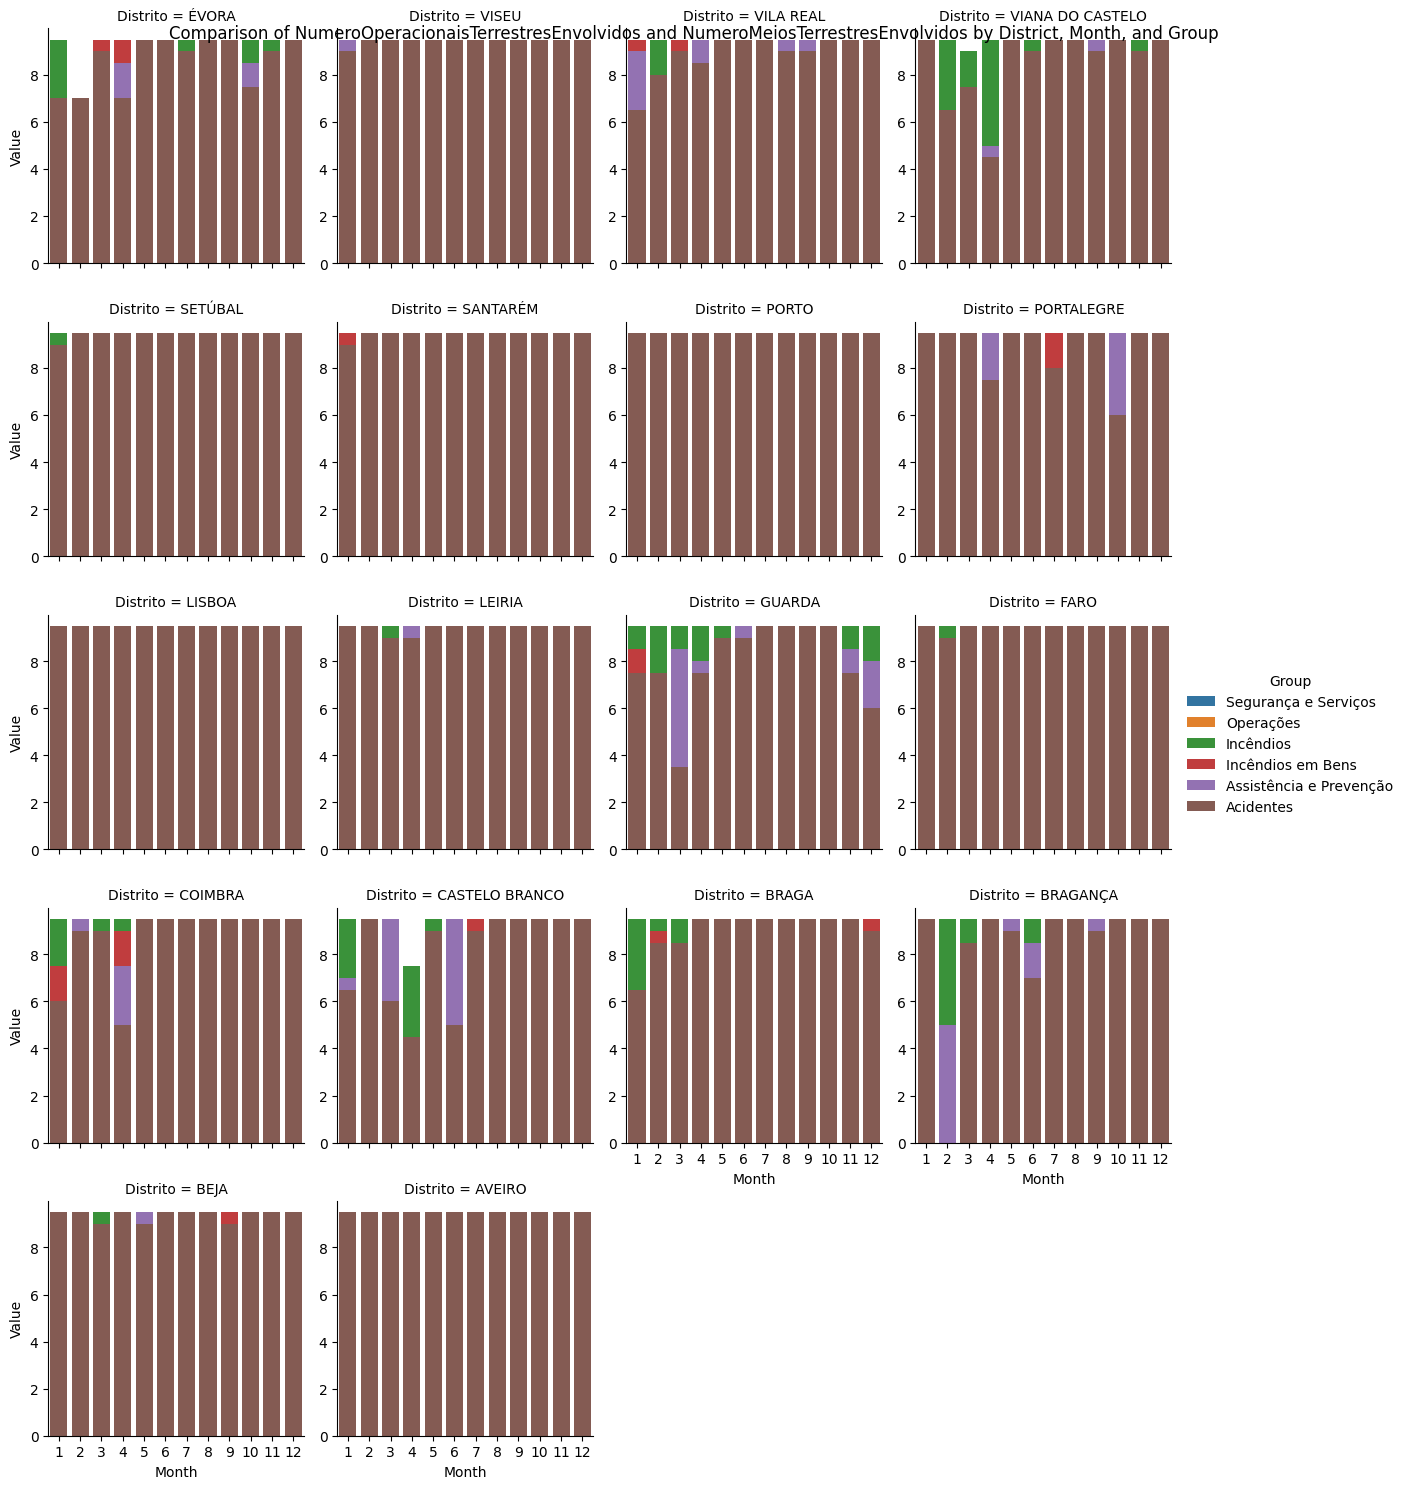

In [ ]:


# 2. Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# 3. Reshape the dataframe to a long format
df_long = pd.melt(new_df, id_vars=['Distrito', 'Group', 'MesOcorrencia__'], 
                  value_vars=['NumeroMeiosTerrestresEnvolvidos_max_max',
                              'NumeroOperacionaisTerrestresEnvolvidos_max_max'],
                  var_name='Metric', value_name='Value')

# 4. Create the faceted bar plot
g = sns.FacetGrid(df_long, col='Distrito', hue='Group', margin_titles=True, sharey=False, col_wrap=4)
g.map(sns.barplot, 'MesOcorrencia__', 'Value', hue_order=df_long['Group'].unique(), order=sorted(df_long['MesOcorrencia__'].unique()), ci=None)
g.add_legend()

# Add x-axis label
g.set_axis_labels('Month', 'Value')
g.set_xticklabels(range(1, 13))

#plt.subplots_adjust(top=0.9)
g.fig.suptitle('Comparison of NumeroOperacionaisTerrestresEnvolvidos and NumeroMeiosTerrestresEnvolvidos by District, Month, and Group')
plt.show()




/home/miguel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/miguel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/miguel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/miguel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
/home/miguel/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, 

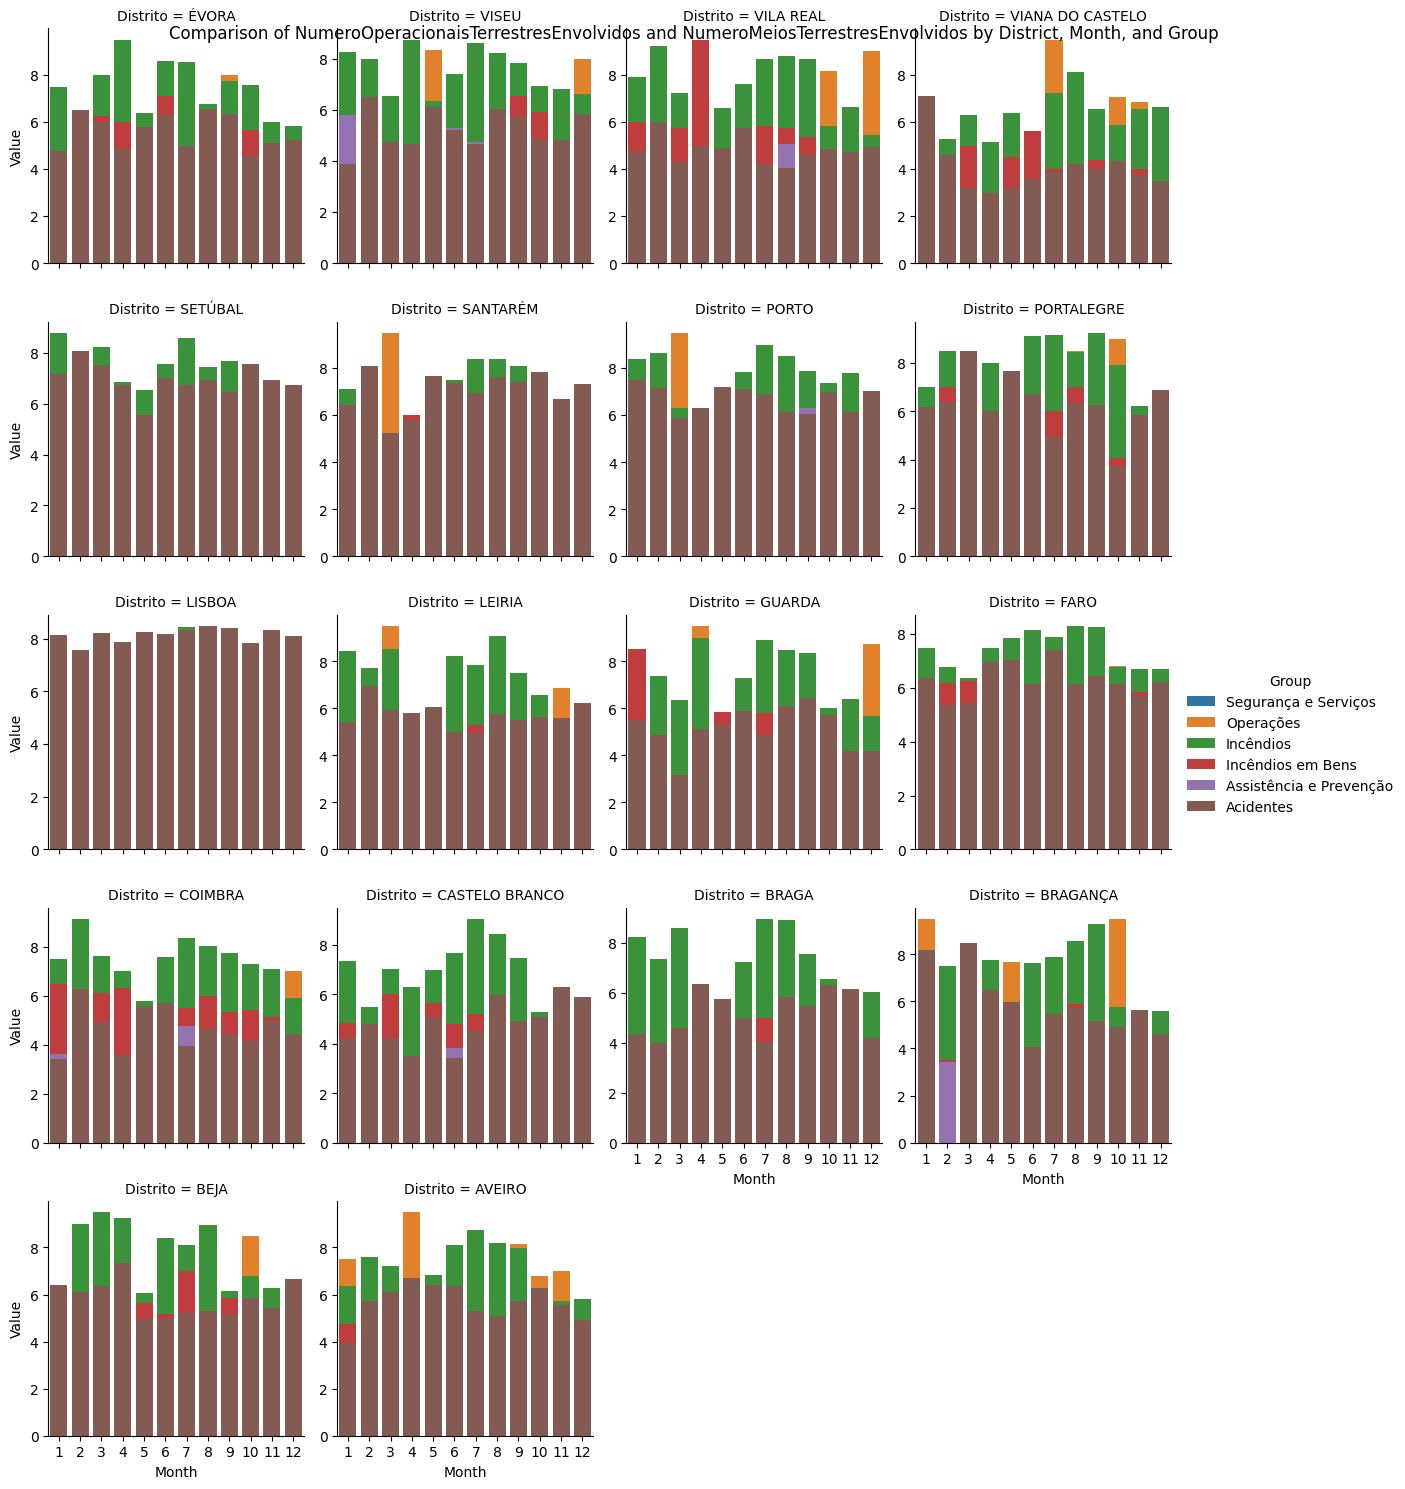

In [ ]:


# 2. Import the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
# 3. Reshape the dataframe to a long format
df_long = pd.melt(new_df, id_vars=['Distrito', 'Group', 'MesOcorrencia__'], 
                  value_vars=['NumeroMeiosTerrestresEnvolvidos_max_mean',
                              'NumeroOperacionaisTerrestresEnvolvidos_max_mean'],
                  var_name='Metric', value_name='Value')

# 4. Create the faceted bar plot
g = sns.FacetGrid(df_long, col='Distrito', hue='Group', margin_titles=True, sharey=False, col_wrap=4)
g.map(sns.barplot, 'MesOcorrencia__', 'Value', hue_order=df_long['Group'].unique(), order=sorted(df_long['MesOcorrencia__'].unique()), ci=None)
g.add_legend()

# Add x-axis label
g.set_axis_labels('Month', 'Value')
g.set_xticklabels(range(1, 13))

#plt.subplots_adjust(top=0.9)
g.fig.suptitle('Comparison of NumeroOperacionaisTerrestresEnvolvidos and NumeroMeiosTerrestresEnvolvidos by District, Month, and Group')
plt.show()




In [ ]:
!pip install plotly


In [ ]:
import pandas as pd
import plotly.graph_objects as go
from ipywidgets import interact, Dropdown
from IPython.display import clear_output

# Assuming your dataframe is named 'df'

# Create a function to generate a bar chart for the selected district, month, and group
def create_chart(district, month, group):
    temp_df = new_df[(new_df['Distrito'] == district) & (new_df['MesOcorrencia__'] == month) & (new_df['Group'] == group)]

    fig = go.Figure()

    fig.add_trace(go.Bar(
        x=['Max', 'Mean', 'Min'],
        y=temp_df[['NumeroOperacionaisTerrestresEnvolvidos_max_max', 'NumeroOperacionaisTerrestresEnvolvidos_max_mean', 'NumeroOperacionaisTerrestresEnvolvidos_max_min']].values[0],
        name='NumeroOperacionaisTerrestresEnvolvidos',
        marker_color='rgb(55, 83, 109)'
    ))

    fig.add_trace(go.Bar(
        x=['Max', 'Mean', 'Min'],
        y=temp_df[['NumeroMeiosTerrestresEnvolvidos_max_max', 'NumeroMeiosTerrestresEnvolvidos_max_mean', 'NumeroMeiosTerrestresEnvolvidos_max_min']].values[0],
        name='NumeroMeiosTerrestresEnvolvidos',
        marker_color='rgb(26, 118, 255)'
    ))

    fig.update_layout(
        title=f'District: {district}, Month: {month}, Group: {group}',
        xaxis_tickfont_size=14,
        yaxis=dict(
            title='Values',
            titlefont_size=16,
            tickfont_size=14,
        ),
        legend=dict(
            x=0,
            y=1.0,
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        ),
        barmode='group',
        bargap=0.15,
        bargroupgap=0.1
    )

    return fig

# Create the interactive dropdown menu
districts = new_df['Distrito'].unique()
months = new_df['MesOcorrencia__'].unique()
groups = new_df['Group'].unique()

dropdown_district = Dropdown(options=districts, value=districts[0], description='Distrito:')
dropdown_month = Dropdown(options=months, value=months[0], description='MesOcorrencia__:')
dropdown_group = Dropdown(options=groups, value=groups[0], description='Group:')

# Create the interactive plot with the dropdown menu
@interact(district=dropdown_district, month=dropdown_month, group=dropdown_group)
def update_chart(district, month, group):
    clear_output(wait=True)  # Clear the previous plot
    fig = create_chart(district, month, group)
    fig.show()


interactive(children=(Dropdown(description='Distrito:', options=('ÉVORA', 'VISEU', 'VILA REAL', 'VIANA DO CAST…